In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)


# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from statsmodels.tools.eval_measures import rmse

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
location = r"F:/EducationalData/Simplilearn/ML/Files/datasets/housing.csv"

In [3]:
housing = pd.read_csv(location)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.shape

(20640, 10)

In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
housing['total_bedrooms'].mean()

537.8705525375618

In [60]:
housing['total_bedrooms'].fillna(435).head(5)

0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64

In [61]:
#housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace=True)

In [62]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [95]:
X = housing[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']]
y = housing['median_house_value']


In [96]:
#NEAR OCEAN 4 NEAR BAY 3 ISLAND 2 INLAND 1 <1H OCEAN 0 
X['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [97]:
# from scipy import stats
# #stats.f_oneway(X['longitude'],X['latitude'])
# stats.f_oneway(X['housing_median_age'],X['total_rooms'] /
#                X['population'], X['households'] /
#                X['median_income']
#               )
# # stats.f_oneway(X['longitude', 'latitude'])

In [98]:
X['ocean_proximity'] = LabelEncoder().fit_transform(X['ocean_proximity'])

C:\Users\Satnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
X['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [100]:
#X.dtypes
#1.set run algo without scaling s
#ocean to num
#scaling
#
y.dtypes

dtype('int64')

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [103]:
from sklearn import linear_model
import sklearn as sk
algo = linear_model.LinearRegression()
algo.fit (X_train, y_train)
pred_y = algo.predict(X_test)

MSE = sk.metrics.mean_squared_error(y_test, pred_y)
print ("MSE for housing dataset using linear regression is" , MSE)
print("Final rmse value is =",np.sqrt(np.mean((y_test-pred_y)**2)))

MSE for housing dataset using linear regression is 4921266956.732315
Final rmse value is = 70151.7423641944


C:\Users\Satnam\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


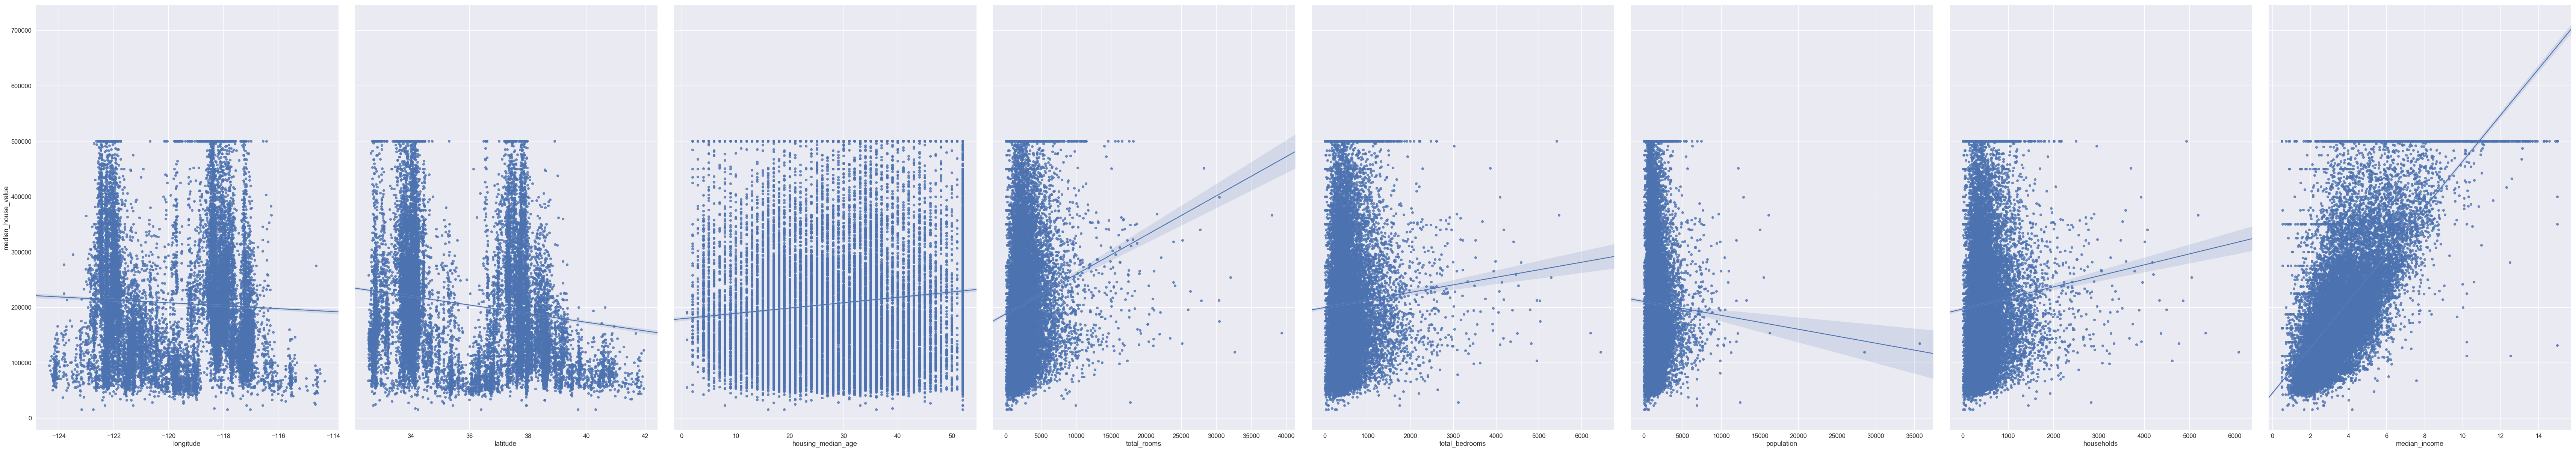

In [104]:
sns.pairplot(housing, 
             x_vars=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'], 
             y_vars= 'median_house_value',
             size=17, 
             aspect=0.7, 
             kind='reg');

NameError: name 'stats' is not defined

In [ ]:
from sklearn import linear_model
import sklearn as sk
algo = linear_model.LinearRegression()
algo.fit (X_train, y_train)
pred_y = algo.predict(X_test)

MSE = sk.metrics.mean_squared_error(y_test, pred_y)
print ("MSE for housing dataset using linear regression is" , MSE)
print("Final rmse value is =",np.sqrt(np.mean((y_test-pred_y)**2)))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(X)

In [ ]:
rescaledX = scaler.transform(X)

In [ ]:
colnames=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
X_scaled = pd.DataFrame(rescaledX, columns=colnames)
X_scaled.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8))

ax1.set_title('Before Standarrising')
sns.kdeplot(X['longitude'], ax=ax1)
sns.kdeplot(X['latitude'], ax=ax1)
sns.kdeplot(X['housing_median_age'], ax=ax1)
sns.kdeplot(X['total_rooms'], ax=ax1)
sns.kdeplot(X['total_bedrooms'], ax=ax1)
sns.kdeplot(X['population'], ax=ax1)
sns.kdeplot(X['households'], ax=ax1)
sns.kdeplot(X['median_income'], ax=ax1)
sns.kdeplot(X['ocean_proximity'], ax=ax1)



ax2.set_title('After Standarrising')
sns.kdeplot(X_scaled['longitude'], ax=ax2)
sns.kdeplot(X_scaled['latitude'], ax=ax2)
sns.kdeplot(X_scaled['housing_median_age'], ax=ax2)
sns.kdeplot(X_scaled['total_rooms'], ax=ax2)
sns.kdeplot(X_scaled['total_bedrooms'], ax=ax2)
sns.kdeplot(X_scaled['population'], ax=ax2)
sns.kdeplot(X_scaled['households'], ax=ax2)
sns.kdeplot(X_scaled['median_income'], ax=ax2)
sns.kdeplot(X_scaled['ocean_proximity'], ax=ax2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=0)

In [ ]:
type(X_train)

In [ ]:
X_train = X_train.values

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:

#plt.scatter(X_train[:,5],y_train,c='red')
#plt.show()

In [ ]:
from sklearn import linear_model
import sklearn as sk
algo = linear_model.LinearRegression()
algo.fit (X_train, y_train)
pred_y = algo.predict(X_test)

MSE = sk.metrics.mean_squared_error(y_test, pred_y)
print ("MSE for housing dataset using linear regression is" , MSE)
print("Final rmse value is =",np.sqrt(np.mean((y_test-pred_y)**2)))

In [ ]:

# plt.scatter(X_train[:,7],y_train,c='red')
# plt.show()
# plt.plot(X_test,pred_y)   
# plt.scatter(X_test,pred_y,c='red')
# plt.xlabel('headsize')
# plt.ylabel('brain weight')

(8256,)

(12384, 9) (12384,) (8256, 9) (8256,)


SyntaxError: invalid syntax (<ipython-input-156-7c2d13d41d9c>, line 3)

0

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [67]:
colnames = ['long', 'lat', 'ho_med', 't_rooms', 't_brooms', 'pop', 'ho_no', 'med_inc', 'oce_prox']
scaler = MinMaxScaler(feature_range=(0, 1))
re_X = scaler.fit_transform(X)
re_X

0

In [142]:
re_y_train

NameError: name 're_y_train' is not defined

In [ ]:

df_scaled = pd.DataFrame(rescaledX, columns=colnames)
df_scaled.head()

C:\Users\Burning Desire\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


461      3
12085    1
11333    0
175      3
42       3
Name: ocean_proximity, dtype: int64

In [127]:
#colnames = ['log', 'lat', 'hou_med_age', 'T_rooms', 'T_bedRooms', 'popul', 'households', 'median_income', 'ocean_dis']
#housing = pd.DataFrame(X, columns = colnames)
#housing.head()
#dataframe = pd.read_csv(location)

#array = housing.values

#X = array[:, 0:9]
#y = array[:, 9]


C:\Users\Burning Desire\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
461,-122.26,37.87,52,2773,998.0,1721,949,1.1859,3,241700
12085,-117.34,33.89,17,2678,394.0,1225,367,5.3630,1,211300
11333,-117.96,33.75,22,2300,539.0,1625,542,2.7800,0,196300
175,-122.24,37.80,52,1591,373.0,1118,347,2.1563,3,128600
42,-122.26,37.84,49,713,202.0,462,189,1.0250,3,118800
